# Développement d'un Agent IA pour la Résolution d'un Puzzle 3x3 (8 Puzzle)

Dans ce projet, nous allons créer un agent IA pour résoudre un puzzle de 3 lignes et 3 colonnes, où chaque case contient un chiffre de 1 à 8, sans répétition, avec une case vide. L'objectif de l'agent est de déplacer les cases en utilisant la case vide afin d'obtenir l'ordre croissant de 1 à 8.

## Environnemment

| 1 | 2 | 3 |
|---|---|---|
| 4 | 5 | 6 |
|   7| 8 |  |


### Type de l'environnement 
1) Entièrement observable: l'agent a accès à toutes les informations nécessaires pour connaître l'état du puzzle dès la première observation.
2) Déterministe : chaque action de l'agent entraine un état attendu, sans variations inattendues.
3) Statique: l'état du l'environnement ne se change pas de manière autonome. c'est l'action executé par l'agent qui modifie la position des cases.
4) Discret: dans le puzzle 3x3, il y a un nombre limité de cases et de configurations possibles pour les chiffres et la case vide. Chaque mouvement mène à un état distinct et identifiable du puzzle.
5) Connu : l’agent sait que chaque action déplace la case vide dans une direction précise et produit un état bien défini, sans aucune incertitude.
6) Séquentiel: les actions sont donc séquentielles car elles s'enchaînent logiquement et influencent les états futurs de l’environnement.
7) Agent unique : il n’y a qu'un seul agent qui manipule les cases pour atteindre l’objectif. Aucun autre agent ne participe à la résolution du puzzle.  

### Representation de l'evironnement :
L'état du puzzle 3X3 peut être représenter par une matrice 2D, chaque cellule contient un nombre de 1 à 8 et une case vide représenter par 0. 

In [13]:
# Exemple d'état initial
initial_state = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 0, 8]  # 0 représente la case vide
]

### Test de solvabilité

Il n'est pas possible de résoudre une instance de 8 puzzle si le nombre d'inversions est impair dans l'état d'entrée.

| 1 | 2 | 3 |
|---|---|---|
| 4 | 5 | 6 |
|   | 8 | 7 |


Écrivez-le de façon linéaire, 1,2,3,4,5,6,8,7 - Ne tenez pas compte de la tuile vide.

Trouvez maintenant le nombre d'inversions, en comptant les tuiles qui précèdent une autre tuile avec un nombre inférieur.

Dans notre cas, 1,2,3,4,5,6,7 a 0 inversion, et 8 a 1 inversion car il précède le chiffre 7.

Le nombre total d'inversions est de 1 (nombre impair) et le puzzle est donc insoluble.


-----------------------------------------------------------------------------------------------------------------------------------------------



| 5 | 2 | 8 |
|---|---|---|
| 4 | 1 | 7 |
|   | 3 | 6 |

5 précède 1,2,3,4 - 4 inversions

2 précède 1 - 1 inversion

8 précède 1,3,4,6,7 - 5 inversions

4 précèdent 1,3 - 2 inversions

1 précède aucun - 0 inversions

7 précède 3,4 - 2 inversions

3 précède aucun - 0 inversions

6 précède aucun - 0 inversions

total des inversions 4+1+5+2+0+2+0+0 = 14 (nombre pair)
Cette énigme peut donc être résolue.

## Class Environnemt

La classe Environnement représente l'état d'un puzzle 3x3 et contient deux méthodes principales :

<span style="color: orange; font-weight: 700">is_goal</span> vérifie si l'état actuel correspond à l'état objectif (cases ordonnées de 1 à 8 avec une case vide).

<span style="color: orange; font-weight: 700">is_solvable</span> détermine si le puzzle est résolvable en comptant les inversions, ce qui indique la possibilité de résoudre l'état initial.

In [14]:
class Environnement:

    def __init__(self, initial_state):
        # Initialisation de l'environnement par un état de départ.
        self.state = initial_state

    # Vérifier si l'état actuel est l'état objective
    def is_goal(self, state):
        goal_state = [
            [1, 2, 3],
            [4, 5, 6],
            [7, 8, 0]
        ]
        return state == goal_state

    def is_solvable(self):
        # Aplatir l'état et retirer le zéro (case vide)
        flat_puzzle = [num for row in self.state for num in row if num != 0]
        inversions = 0

        # Compter les inversions
        for i in range(len(flat_puzzle)):
            for j in range(i + 1, len(flat_puzzle)):
                if flat_puzzle[i] > flat_puzzle[j]:
                    inversions += 1

        # Le puzzle est solvable si :
        # - le nombre d'inversions est pair
        return inversions % 2 == 0

## Test class Environnement

In [ ]:
initial_state = [
    [1, 2, 3],
    [4, 5, 6],
    [0, 8, 7]
]
environnement = Environnement(initial_state)
assert environnement.is_solvable() == False, f"Erreur l'état doit être insoulvable"
print(f"l'état founrie n'est pas soulvable")

## Class Capteur

La classe Capteur fournit à l'agent les informations sur l'état actuel du puzzle et la position de la case vide en accédant directement à l'environnement. Elle permet ainsi à l'agent de prendre des décisions en fonction de la configuration courante des cases.

In [16]:
class Capteur:

    def __init__(self, environnement):
        self.environnement = environnement

    # Lire l'état actuel
    def get_current_state(self):
        return self.environnement.state

    # Trouver la position de la case vide
    def find_empty(self, state):
        for i, row in enumerate(state):
            if 0 in row:
                # print(f"la position de vide et {i, row.index(0)}")
                return i, row.index(0)

### Test de la class Capteur

In [ ]:
# Étape 1 : Créer un état initial du puzzle
initial_state = [
    [1, 2, 3],
    [4, 0, 5],  # 0 représente la case vide position (1,1)
    [6, 7, 8]
]

# Créer l'Environnement
environnement = Environnement(initial_state)

# Créer le capteur
capteur = Capteur(environnement)

# Étape 4 : Tester la méthode lire_etat()
etat = capteur.get_current_state()
assert etat == initial_state, f"Erreur : l'état lu est {etat}, attendu {initial_state}"

# Étape 5 : Tester la méthode position_vide()
position_vide = capteur.find_empty(etat)
assert position_vide == (
    1, 1), f"Erreur : position vide est {position_vide}, attendu (1, 1)"

print(f"Etat initial est : {initial_state}")

print(f"position vide est : {position_vide}")

print("Tous les tests du capteur ont réussi !")

## Class Actionneur
La classe Actionneur permet à l'agent de générer les états voisins possibles en déplaçant la case vide du puzzle dans les quatre directions (haut, bas, gauche, droite). Elle vérifie que les mouvements restent dans les limites et crée de nouveaux états en échangeant les cases. L’actionneur met également à jour l'état de l'environnement avec l'état sélectionné pour le prochain mouvement de l'agent.

In [18]:
class Actionneur:
    def __init__(self, environnement, capteur):
        self.environnement = environnement
        self.capteur = capteur

    # Générer les états suivants
    def generate_next_states(self, state):
        states = []
        # Utiliser self pour accéder à capteur
        row, col = self.capteur.find_empty(state)

        # Haut, bas, gauche, droite
        directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

        for d_row, d_col in directions:
            new_row, new_col = row + d_row, col + d_col
            if 0 <= new_row < 3 and 0 <= new_col < 3:  # Assurer que le mouvement reste dans les limites
                new_state = [r[:] for r in state]  # Créer une copie de l'état
                # Échanger les cases
                new_state[row][col], new_state[new_row][new_col] = new_state[new_row][new_col], new_state[row][col]
                states.append(new_state)

        return states

    # Mettre à jour l'état de l'environnement
    def update_environment(self, new_state):
        self.environnement.state = new_state

### Test Actionneur

In [19]:
# environnemt est déjà initialiser dans le Test capteur
# capteur est déjà initialiser dans le Test capteur

###### Rappel de l'état initial ###########

# initial_state = [
#     [1, 2, 3],
#     [4, 0, 5],
#     [6, 7, 8]
# ]

###########################################


# Initialisation de l'Actionneur
actionneur = Actionneur(environnement, capteur)

state = capteur.get_current_state()

# Générer les états
states = actionneur.generate_next_states(state)

# État suivants attendus après les différentes actions
expected_states = [
    [
        [1, 0, 3],
        [4, 2, 5],
        [6, 7, 8]
    ],
    [
        [1, 2, 3],
        [4, 7, 5],
        [6, 0, 8]
    ],
    [
        [1, 2, 3],
        [0, 4, 5],
        [6, 7, 8]
    ],
    [
        [1, 2, 3],
        [4, 5, 0],
        [6, 7, 8]
    ]
]

# État attendu pour le test de mise à jour
new_state = [
    [1, 2, 3],
    [4, 5, 0],
    [6, 7, 8]
]


# Vérifier que le nombre d'états générés correspond au nombre d'états attendus
assert len(states) == len(expected_states), "Nombre de states incorrect"
print("Test du nombre d'états possibles est bien passé !")

# Vérifier chaque état généré par rapport à chaque état attendu
for state in states:
    assert state in expected_states, f"État inattendu : {state}"
print("Test de correspondance des états est bien réussi !")

# Appeler la méthode update_environment avec le nouvel état
actionneur.update_environment(new_state)

# Vérifier que l'état de l'environnement a été mis à jour correctement
assert environnement.state == new_state, "L'état de l'environnement n'a pas été mis à jour correctement"
print("Test de mise à jour de l'état de l'environnement est bien passé !")

print("Tous les tests sont passés avec succès !")

Test du nombre d'états possibles est bien passé !
Test de correspondance des états est bien réussi !
Test de mise à jour de l'état de l'environnement est bien passé !
Tous les tests sont passés avec succès !


### Class Agent

L'agent est un agent basé sur des objectifs avec une représentation atomique, utilisant l'algorithme A pour résoudre un puzzle 3x3. Il se sert de la distance de Manhattan comme heuristique afin de guider la recherche d'une solution optimale en explorant les états voisins de manière prioritaire.

### La Distance de Manhattan
[![Video Title](https://img.youtube.com/vi/p3HbBlcXDTE/0.jpg)](https://www.youtube.com/watch?v=p3HbBlcXDTE)

### Algorithme A* avec la recherhce heuristique

[![Video Title](https://img.youtube.com/vi/5RcAYMzT6jY/0.jpg)](https://www.youtube.com/watch?v=5RcAYMzT6jY)

 <span style="color: orange; font-weight: 700">La fonction manhattan</span> calcule la distance totale que chaque tuile (excepté la case vide) doit parcourir pour atteindre sa position correcte dans le puzzle 8. Cela est réalisé en itérant sur chaque case, en déterminant sa position actuelle et sa position cible, puis en accumulant les distances nécessaires. Cette heuristique aide l'algorithme A* à évaluer l'efficacité des états explorés lors de la recherche d'une solution au puzzle.

In [24]:
from heapq import heappop, heappush


class Agent:
    def __init__(self, environnement, capteur, actionneur):
        self.environnement = environnement
        self.capteur = capteur
        self.actionneur = actionneur

    # calcule la distance totale de manhattan qui sera utiliser par l'algorithme A* pour aider à prendre des décisions optimales lors de la recherche d'une solution.
    def manhattan(self, puzzle):
        dist = 0
        for i in range(3):
            for j in range(3):
                value = puzzle[i][j]
                if value != 0:
                    target_row = (value - 1) // 3
                    target_col = (value - 1) % 3
                    dist += abs(i - target_row) + abs(j - target_col)
        return dist

    def solve(self):

        # Check if the puzzle is solvable
        if not self.environnement.is_solvable():
            return None  # Return if the puzzle is not solvable

        # ---> une liste utilisée comme une file de priorité pour les états à explorer, initialement vide.
        open_set = []
        initial_state = self.capteur.get_current_state()

        # -----------------------------------------------------------------------------------------------
        #  heappush import depuis la librairie heapq                                                     |
        #  La fonction heappush ajoute l'état initial à open_set, avec :                                 |
        #  (self.manhattan(initial_state) : La distance heuristique de Manhattan pour cet état,          |
        #  0 : Le coût actuel (0 pour l'état initial),                                                   |
        #  initial_state : L'état lui-même,                                                              |
        #  []: Un chemin vide (pas encore de mouvements).                                                |
        #                                                                                                |
        heappush(open_set, (self.manhattan(
            initial_state), 0, initial_state, []))  # |
        # ------------------------------------------------------------------------------------------------
        # ---->  un ensemble qui stocke les états déjà visités pour éviter les répétitions.
        seen = set()

        while open_set:  # ----> Cette boucle continue tant qu'il y a des états à explorer dans open_set
            # heappop retire l'état avec le coût le plus bas de open_set et le stocke dans les variables :
            # _ : la distance heuristique (non utilisée ici),
            # cost : le coût actuel pour atteindre cet état,
            # current : l'état courant du puzzle,
            # path : le chemin parcouru pour atteindre cet état.

            # ---> l'algorithm A* nous fourni une état après faire des calcule
            _, cost, current, path = heappop(open_set)

            # Vérification si l'état voisin est égal à notre état objectif.
            if self.environnement.is_goal(current):
                # ----> mettre à jour l'état de l'environnement
                self.actionneur.update_environment(neighbor_state)
                # ---> afficher l'état actuel de l'environnement après la mise à jour
                print(f"Etat final : {capteur.get_current_state()}")
                # ----> afficher le coût total
                print(f"le coût total est : {cost}")
                return path   # ----> Retourner le chemin

            # --->  ajouter l'état actuel à un ensemble "seen" afin de garder une trace des états déjà visités par l'agent. afin d'éviter des cycles infinis
            seen.add(tuple(map(tuple, current)))
            for neighbor_state in self.actionneur.generate_next_states(current):
                neighbor_tuple = tuple(map(tuple, neighbor_state))
                if neighbor_tuple not in seen:
                    heappush(open_set, (cost + 1 + self.manhattan(neighbor_state),   # ----> on ajoute les états voisins pour fournir à l'algorithme A* des état pour atteindre l'état objectif
                             cost + 1, neighbor_state, path + [neighbor_state]))

        return None  # Si aucune solution n'est trouvée, retourner None et les étapes

### Test Class Agent

In [32]:
# État initial facile pour le test
initial_state = [
    [1, 2, 3],
    [4, 0, 6],
    [7, 5, 8]
]

# Initialisation de l'environnement et des composants
environnement = Environnement(initial_state)
capteur = Capteur(environnement)
actionneur = Actionneur(environnement, capteur)
agent = Agent(environnement, capteur, actionneur)

# Résoudre le puzzle
path = agent.solve()

# Vérifier que le dernier état dans les étapes correspond à l'état objectif
goal_state = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 0]
]

# Test: vérifier si le chemin amène à l'état objectif
assert path[-1] == goal_state, "L'agent n'a pas atteint l'état objectif."
print("Test réussi ! L'agent a trouvé le chemin vers l'état objectif.")


# Imprimer les étapes de la solution
print("Étapes pour atteindre l'état objectif:")
path.insert(0, initial_state)
for step in path:
    for row in step:
        print(row)
    print()

Etat final : [[1, 2, 3], [4, 5, 6], [7, 8, 0]]
le coût total est : 2
Test réussi ! L'agent a trouvé le chemin vers l'état objectif.
Étapes pour atteindre l'état objectif:
[1, 2, 3]
[4, 0, 6]
[7, 5, 8]

[1, 2, 3]
[4, 5, 6]
[7, 0, 8]

[1, 2, 3]
[4, 5, 6]
[7, 8, 0]



## Class PuzzleService

La classe PuzzleService est dédiée à l'affichage graphique d'un puzzle de type 3x3. Elle contient deux méthodes principales : display_puzzle, qui affiche un état donné du puzzle sur une grille, et display_steps, qui montre une séquence d'états pas à pas avec une pause d'une seconde entre chaque étape. Cette classe facilite ainsi la visualisation des déplacements dans le puzzle.

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from time import sleep


class PuzzleService:
    def __init__(self):
        pass

    def display_puzzle(self, state):
        puzzle_grid = np.array(state)
        fig, ax = plt.subplots(figsize=(4, 4))
        ax.matshow(np.zeros((3, 3)), cmap="gray")
        for i in range(3):
            for j in range(3):
                if puzzle_grid[i, j] == 0:
                    ax.text(j, i, "", va='center', ha='center', fontsize=30, color='red', bbox=dict(
                        facecolor='white', edgecolor='black'))
                else:
                    ax.text(j, i, str(puzzle_grid[i, j]), va='center', ha='center', fontsize=30, bbox=dict(
                        facecolor='white', edgecolor='black'))
        plt.xticks([])
        plt.yticks([])
        plt.show()

    def display_steps(self, steps):
        for step in steps:
            self.display_puzzle(step)
            sleep(1)  # Pause de 1 seconde entre les étapes

In [30]:
class Main:
    def __init__(self, initial_state):
        self.environment = Environnement(initial_state)
        self.capteur = Capteur(self.environment)
        self.actionneur = Actionneur(self.environment, self.capteur)
        self.agent = Agent(self.environment, self.capteur, self.actionneur)
        self.puzzle_service = PuzzleService()
        self.first_state = initial_state

    def run(self):
        solution = self.agent.solve()

        if solution:
            print("Solution trouvée !")
            self.puzzle_service.display_puzzle(self.first_state)
            self.puzzle_service.display_steps(solution)
        else:
            print("Pas de solution possible.")

## <span style="color: brown; font-weight: 900"> Spécification PEAS (Performance Measure, Environement, Actuators, Sensors) <span>

<span style="color: orange; font-weight: 700">1. Performance Measure (Mesure de Performance)</span><br/>
<br/>
L'agent vise à résoudre le puzzle en atteignant l'état objectif (grille ordonnée de 1 à 8 avec une case vide). Les critères de performance incluent :<br/>
<ul>
<li><strong>Minimiser le nombre de déplacements </strong> pour atteindre la solution (coût total).</li>
<li><strong> Minimiser le temps d'exécution </strong> ou la profondeur de recherche pour une résolution rapide.</li>
<li><strong>Optimisation de la mémoire </strong> en évitant de revisiter des états déjà explorés, grâce à l’utilisation de la liste seen.</li>
</ul>




<span style="color: orange; font-weight: 700">2. Environment (Environnement)</span><br/>
<br/>
L'environnement du puzzle est :
<ul>
<li><strong>Entièrement observable :</strong> L'agent connaît l'intégralité de la grille à tout moment, y compris la position actuelle de chaque tuile et de la case vide.</li>
<li><strong>Déterministe :</strong> Chaque action (déplacement d'une tuile) entraîne un changement de l'état du puzzle de manière prédictible.</li>
<li><strong>Statique :</strong> L'environnement ne change pas de lui-même pendant que l'agent réfléchit ; il n’y a pas de mouvements indépendants des tuiles.</li>
<li><strong>Discret :</strong> L'environnement est limité à des états distincts dans une grille de 3x3, avec un ensemble fixe de positions pour chaque tuile.</li>
</ul>

<span style="color: orange; font-weight: 700">3. Actuators (Actionneurs)</span><br/>
<br/>
Les actionneurs de l’agent permettent de manipuler les tuiles du puzzle en fonction de la position de la case vide :
<ul>
<li><strong>Déplacer la case vide :</strong> L'agent peut déplacer la case vide vers le haut, le bas, la gauche ou la droite, à condition que ces mouvements soient possibles dans les limites de la grille.</li>
<li><strong>Génération des états voisins :</strong> À partir de l’état actuel, l’agent génère de nouveaux états en effectuant les déplacements possibles, évaluant chaque état pour déterminer la meilleure trajectoire.</li>
</ul>

<span style="color: orange; font-weight: 700">4. Sensors (Capteurs)</span><br/>
<br/>
Les capteurs de l'agent incluent :
<ul>
<li><strong>Lecture de l’état actuel :</strong> Le capteur lit la configuration complète de la grille (position de chaque tuile et de la case vide) pour analyser la situation.</li>
<li><strong>Capteur de position vide :</strong> Identifie la position de la case vide, indispensable pour calculer les mouvements possibles.</li>
</ul>

## Exemples des états Initiales

In [37]:

# les états initiaux testés


# ----- Facile ------ 

# ------- 1 ---------

initial_puzzle = [
    [1, 2, 3],
    [4, 0, 6],
    [7, 5, 8]
]


# ------- 2 --------
# initial_puzzle = [
#     [1, 2, 3],
#     [4, 0, 5],
#     [7, 8, 6]
# ]


# ----- Difficulté intermédiaire ------

# ------- 3 --------
# initial_puzzle = [
#     [1, 0, 3],
#     [4, 2, 5],
#     [7, 8, 6]
# ]


# ------ 4 --------
# initial_puzzle = [
#     [1, 2, 3],
#     [0, 4, 5],
#     [7, 8, 6]
# ]


# ------- 5 --------
# initial_puzzle = [
#     [2, 0, 3],
#     [1, 4, 5],
#     [7, 8, 6]
# ]


# ----- Difficile ------

# ------- 6 --------
# initial_puzzle = [
#     [1, 2, 3],
#     [4, 0, 5],
#     [6, 7, 8]
# ]


# ------- 7 --------
# initial_puzzle = [
#     [1, 2, 3],
#     [4, 7, 5],
#     [6, 0, 8]
# ]


# ------- 8 --------
# initial_puzzle = [
#     [1, 8, 2],
#     [0, 4, 3],
#     [7, 6, 5]
# ]


# ----- les états initiaux non solvables ------

# # ------- 1 ---------
# initial_puzzle = [
#     [1, 2, 3],
#     [4, 5, 6],
#     [0, 8, 7]
# ]

## Execution

Etat final : [[1, 2, 3], [4, 5, 6], [7, 8, 0]]
le coût total est : 9
Solution trouvée !


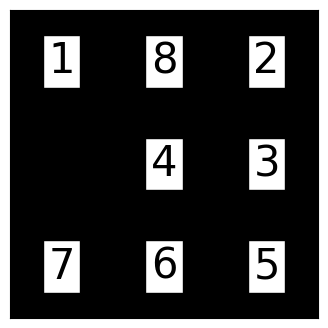

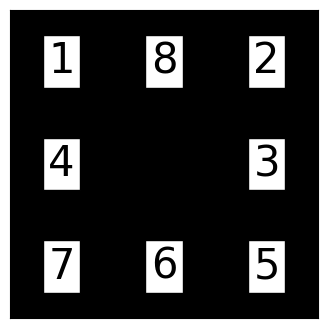

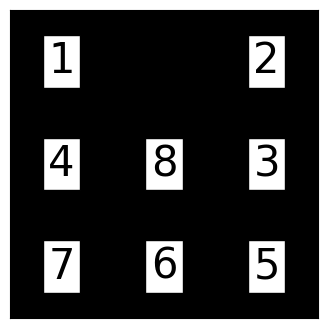

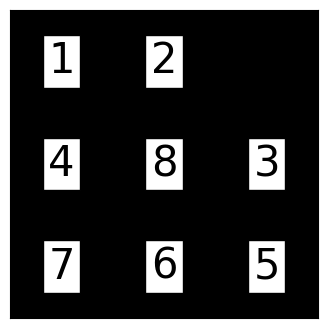

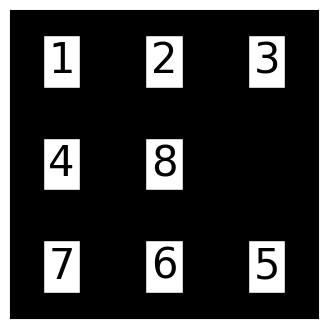

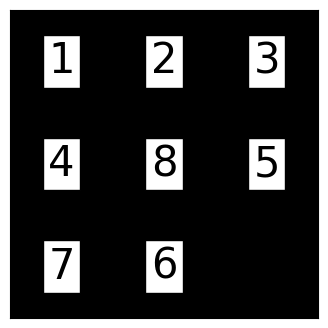

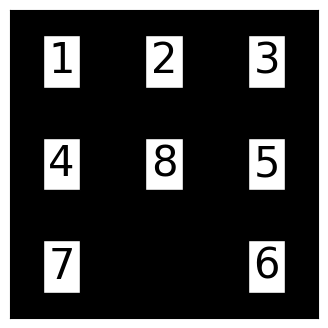

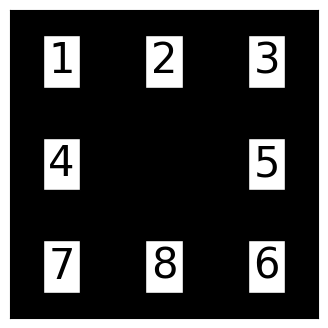

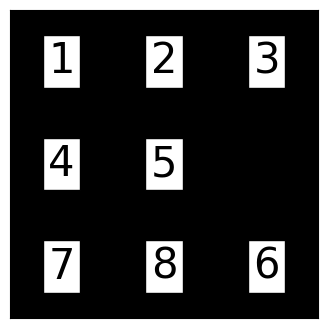

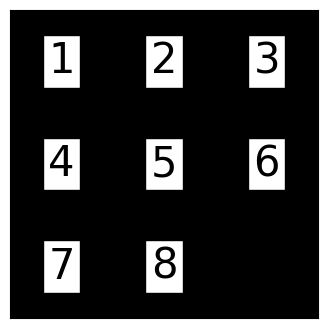

In [38]:
# Exécuter la résolution avec visualisation
main = Main(initial_puzzle)
main.run()